In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score

In [56]:
train_df = pd.read_csv('datasets\\train_220348_ass_9.csv')
test_df = pd.read_csv('datasets\\test_with_label_791460_ass_9.csv')

In [57]:
train_df.head()

,Name,Test Date,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche,Covid_yes_no
0,shivani,24/3/2020,Cough,Headache,Fever,Iran,4,2,0
1,isha,25/3/2020,Cough,Headache,Fever,Mauritius,7,4,1
2,smt shyani devi,26/3/2020,Cough,Headache,Fever,Mozambique,6,4,1
3,divya,27/3/2020,Cough,Headache,Fever,Cameroon,5,2,0
4,mansi,28/3/2020,Cough,Headache,Fever,South Sudan,6,3,1


In [58]:
train_df[train_df.Symptoms_2.isnull()]

,Name,Test Date,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche,Covid_yes_no
71,sandhya,8/6/2020,Headache,NaN,Cough,Norfolk Island,8,3,1
92,jyoti,2/7/2020,Headache,NaN,Cough,South Sudan,5,3,0


In [59]:
train_df[(train_df['Symptoms_1']=='Headache')&(train_df['Symptoms_3']=='Cough')&(train_df['Covid_yes_no']==1)]['Symptoms_2'].mode()

0    Fever
Name: Symptoms_2, dtype: object

In [60]:
train_df[(train_df['Symptoms_1']=='Headache')&(train_df['Symptoms_3']=='Cough')&(train_df['Covid_yes_no']==0)]['Symptoms_2'].mode()

0    Fever
Name: Symptoms_2, dtype: object

In [61]:
train_df.Symptoms_2.fillna('Fever',inplace=True)

In [62]:
train_df[train_df.Symptoms_1.isnull()]

,Name,Test Date,Symptoms_1,Symptoms_2,Symptoms_3,Country Name,Fever since,Headche,Covid_yes_no
69,priti,6/6/2020,NaN,Fever,Cough,Laos,7,5,1
149,santosh singal,5/9/2020,NaN,Fever,Cough,Japan,8,2,1


In [63]:
train_df[(train_df['Symptoms_2']=='Fever')&(train_df['Symptoms_3']=='Cough')&(train_df['Covid_yes_no']==1)]['Symptoms_1'].mode()

0    Headache
Name: Symptoms_1, dtype: object

In [64]:
train_df.Symptoms_1.fillna('Headache',inplace=True)

In [65]:
train_df.columns

Index(['Name ', 'Test Date', 'Symptoms_1', 'Symptoms_2', 'Symptoms_3',
       'Country Name', 'Fever since ', 'Headche ', 'Covid_yes_no'],
      dtype='object')

In [66]:
train_df['duration'] = train_df['Fever since ']+train_df['Headche ']
test_df['duration'] = test_df['Fever since ']+test_df['Headche ']

In [67]:
desc=pd.DataFrame(index=list(train_df))
desc['count']=train_df.shape[0]
desc['unique']=train_df.nunique()
desc['null']=train_df.isnull().sum()
desc['dtype']=train_df.dtypes
desc = pd.concat([desc,train_df.describe().T],axis=1)
desc

,count,unique,null,dtype,count,mean,std,min,25%,50%,75%,max
Name,487,330,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test Date,487,217,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symptoms_1,487,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symptoms_2,487,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symptoms_3,487,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,487,99,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever since,487,5,0,int64,487.0,6.069815,1.434170,4.0,5.0,6.0,7.0,8.0
Headche,487,4,0,int64,487.0,3.468172,1.110423,2.0,2.5,3.0,4.0,5.0
Covid_yes_no,487,2,0,int64,487.0,0.455852,0.498559,0.0,0.0,0.0,1.0,1.0
duration,487,8,0,int64,487.0,9.537988,1.816164,6.0,8.0,10.0,11.0,13.0


In [68]:
desct=pd.DataFrame(index=list(test_df))
desct['count']=test_df.shape[0]
desct['unique']=test_df.nunique()
desct['null']=test_df.isnull().sum()
desct['dtype']=test_df.dtypes
desct = pd.concat([desct,test_df.describe().T],axis=1)
desct

,count,unique,null,dtype,count,mean,std,min,25%,50%,75%,max
Name,54,50,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test Date,54,50,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symptoms_1,54,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symptoms_2,54,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symptoms_3,54,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,54,42,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever since,54,5,0,int64,54.0,5.981481,1.460043,4.0,5.0,6.0,7.0,8.0
Headche,54,4,0,int64,54.0,3.277778,1.122945,2.0,2.0,3.0,4.0,5.0
Covid_yes_no,54,2,0,int64,54.0,0.462963,0.503308,0.0,0.0,0.0,1.0,1.0
duration,54,7,0,int64,54.0,9.259259,1.717668,6.0,8.0,9.0,10.0,12.0


In [69]:
cor_mat = train_df.corr()

C:\Users\farzi\AppData\Local\Temp\ipykernel_17112\2900008985.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = train_df.corr()


<Axes: >

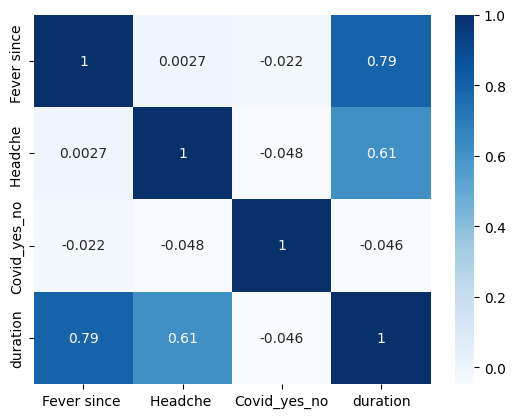

In [70]:
sns.heatmap(cor_mat,annot=True,cmap='Blues')


<Axes: >

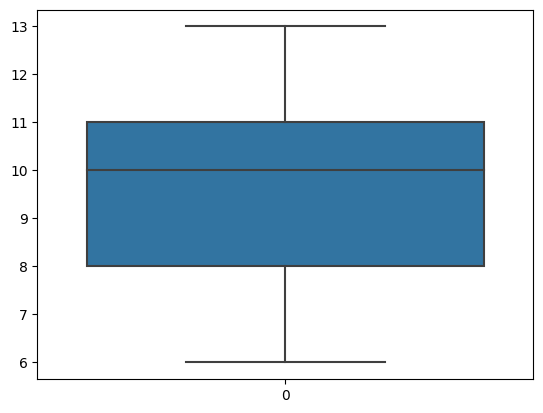

In [72]:
sns.boxplot(train_df['duration'])

Outliers in Fever since :
Empty DataFrame
Columns: [Name , Test Date, Symptoms_1, Symptoms_2, Symptoms_3, Country Name, Fever since , Headche , Covid_yes_no, duration]
Index: []


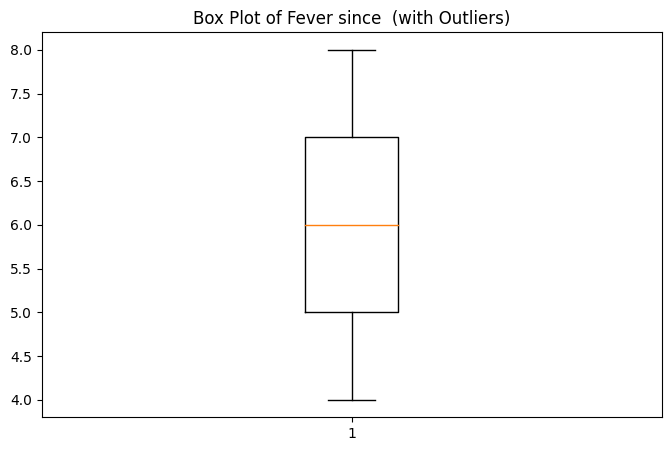

Outliers in Headche :
Empty DataFrame
Columns: [Name , Test Date, Symptoms_1, Symptoms_2, Symptoms_3, Country Name, Fever since , Headche , Covid_yes_no, duration]
Index: []


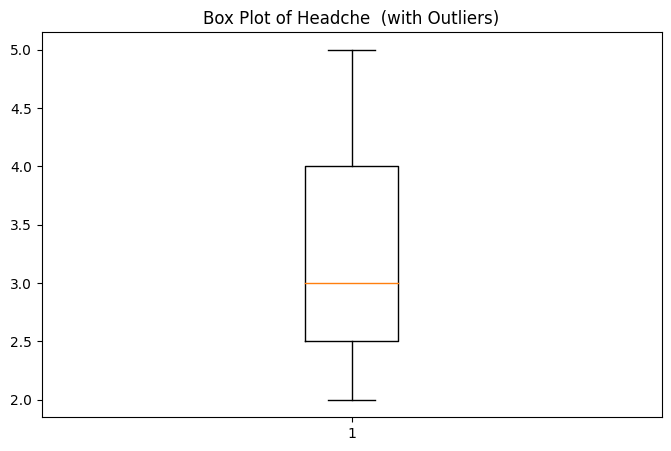

Outliers in Covid_yes_no:
Empty DataFrame
Columns: [Name , Test Date, Symptoms_1, Symptoms_2, Symptoms_3, Country Name, Fever since , Headche , Covid_yes_no, duration]
Index: []


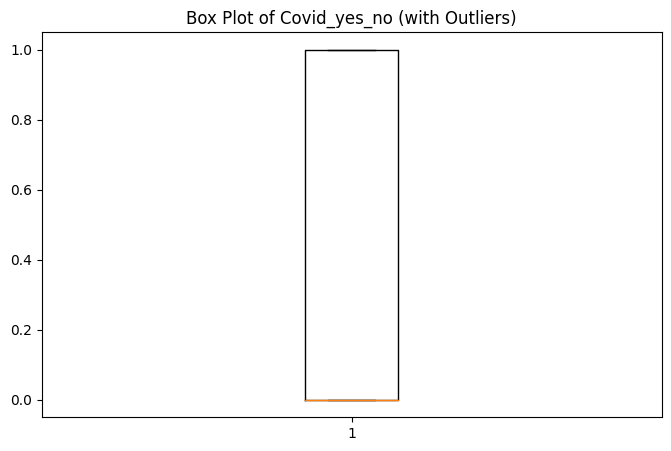

Outliers in duration:
Empty DataFrame
Columns: [Name , Test Date, Symptoms_1, Symptoms_2, Symptoms_3, Country Name, Fever since , Headche , Covid_yes_no, duration]
Index: []


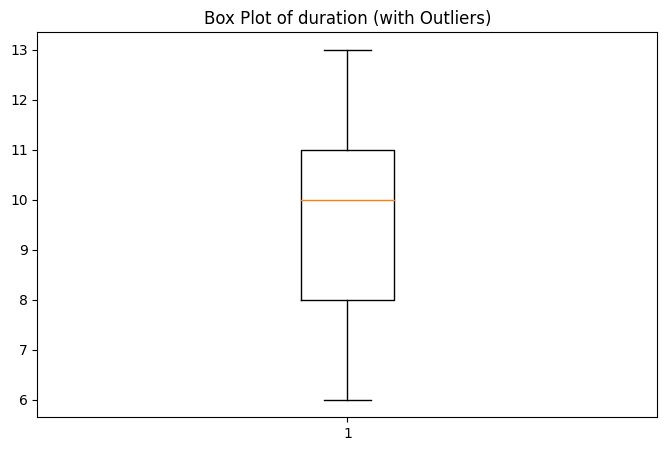

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame called 'train_df'

# List of numerical columns to analyze for outliers
numerical_columns = ['Fever since ', 'Headche ', 'Covid_yes_no', 'duration']

# Loop through each numerical column
for col in numerical_columns:
    # Calculate quartiles and IQR
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    
    # Print or visualize outliers
    print(f"Outliers in {col}:")
    print(outliers)
    
    # Create a box plot with outliers highlighted
    plt.figure(figsize=(8, 5))
    plt.boxplot(train_df[col])
    plt.title(f"Box Plot of {col} (with Outliers)")
    plt.show()


In [80]:
#remove outliers
for col in numerical_columns:
    train_df = outliers = train_df[(train_df[col] > lower_bound) | (train_df[col] < upper_bound)]

In [81]:
train_df.shape[0]

487

- zero outliers

In [83]:
numerical_columns = ['Fever since ', 'Headche ', 'duration']
category_columns = ['Symptoms_1', 'Symptoms_2', 'Symptoms_3']

In [84]:
scaler = StandardScaler()
train_df[numerical_columns]=scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns]=scaler.transform(test_df[numerical_columns])

In [85]:
train_df = pd.get_dummies(train_df,columns=category_columns,drop_first=True)
test_df = pd.get_dummies(test_df,columns=category_columns,drop_first=True)

In [86]:
train_df

,Name,Test Date,Country Name,Fever since,Headche,Covid_yes_no,duration,Symptoms_1_Headache,Symptoms_2_Headache,Symptoms_3_Fever
0,shivani,24/3/2020,Iran,-1.444698,-1.323534,0,-1.950058,0,1,1
1,isha,25/3/2020,Mauritius,0.649254,0.479434,1,0.805828,0,1,1
2,smt shyani devi,26/3/2020,Mozambique,-0.048730,0.479434,1,0.254651,0,1,1
3,divya,27/3/2020,Cameroon,-0.746714,-1.323534,0,-1.398881,0,1,1
4,mansi,28/3/2020,South Sudan,-0.048730,-0.422050,1,-0.296527,0,1,1
...,...,...,...,...,...,...,...,...,...,...
482,smt ladidavi,4/7/2020,Kiribati,1.347239,0.479434,1,1.357005,1,0,0
483,khushbu,5/7/2020,Malaysia,0.649254,-0.422050,0,0.254651,1,0,0
484,sunaina,6/7/2020,Israel,1.347239,1.380918,1,1.908183,1,0,0
485,gulista,7/7/2020,Gibraltar,-0.746714,1.380918,0,0.254651,1,0,0


In [90]:
x_train = train_df.drop(['Covid_yes_no','Name ','Test Date','Country Name'],axis=1)
y_train = train_df['Covid_yes_no']
x_test = test_df.drop(['Covid_yes_no','Name ','Test Date','Country Name'],axis=1)
y_test = test_df['Covid_yes_no']

In [91]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [92]:
y_pred  =model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [93]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

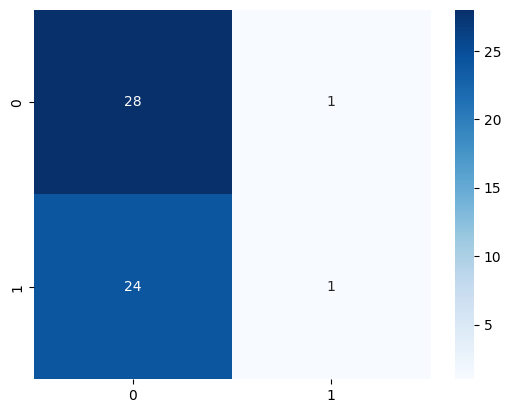

In [94]:
sns.heatmap(cm,annot=True,cmap='Blues')

In [95]:
cm

array([[28,  1],
       [24,  1]], dtype=int64)

In [97]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(TN,TP,FN,FP)

28 1 24 1


In [98]:
precision = precision_score(y_test,y_pred)
precision

0.5

In [100]:
recall = recall_score(y_test,y_pred)
recall

0.04

In [101]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.97      0.69        29
           1       0.50      0.04      0.07        25

    accuracy                           0.54        54
   macro avg       0.52      0.50      0.38        54
weighted avg       0.52      0.54      0.41        54



In [102]:
# Calculate the proportion of fraudulent and non-fraudulent transactions
total_transactions = 6
fraudulent_count = 3
non_fraudulent_count =3

p_fraudulent = fraudulent_count / total_transactions
p_non_fraudulent = non_fraudulent_count / total_transactions

# Calculate Gini Impurity for the dataset
gini_impurity_dataset = 1 - (p_fraudulent ** 2 + p_non_fraudulent ** 2)

print(f"Gini Impurity for the dataset: {gini_impurity_dataset:.4f}")

Gini Impurity for the dataset: 0.5000
